# Image Classifier

The EHT needs an image classifier to distingish different types of images from its image reconstruction algorithms.
This is basically an unsupervised learning problem that standard clustering algorithms may be useful.
It is also possible to combine topological data analysis techniques with other machine learning methods.

## Synthetic Images

We start by creating some synthentic images based on two very simple functions: Gaussian and positive-noise.

In [1]:
# Import relevant modules
import numpy as np
# Import plotting modules
import matplotlib.pyplot as plt
%matplotlib inline


# Import Machine Learning Library module: Scikit-Learn
from sklearn.cluster import KMeans

In [2]:
n = 256

a = np.linspace(-50, 50, n)
x, y = np.meshgrid(a, a)

k = np.fft.fftfreq(n, a[1]-a[0])
kx, ky = np.meshgrid(k, k)

def Gaussian(sigma):
    return np.exp(-0.5 * (x*x + y*y) / (sigma * sigma))

def noise(alpha):
    white_noise = np.random.rand(n, n)-0.5 + 1j*(np.random.rand(n, n)-0.5)
    power_law = np.power(kx*kx + ky*ky + 1e-300, -0.5 * alpha)
    power_law[0,0] = 0
    img  = np.real(np.fft.ifft2(white_noise * power_law))
    img += np.min(img)
    img /= np.max(img)
    return img

From these two functions, we can get many interesting synthetic images.

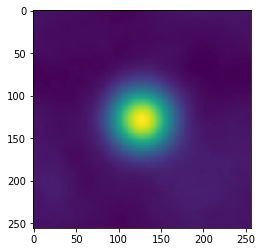

In [6]:
blob = Gaussian(10) + 0.01 * noise(2)
plt.imshow(blob)

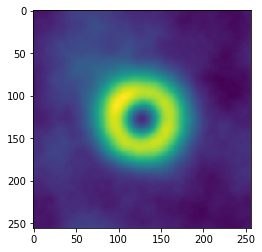

In [14]:
ring = Gaussian(10) - Gaussian(8) + 0.01 * noise(2)
plt.imshow(ring)

These images will be different everythign you generate them because of the random number gneerators.  The goal now is to develop classification algorithms to turn them into diferent categories.

# Trying to create a image dataset

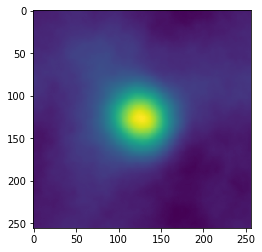

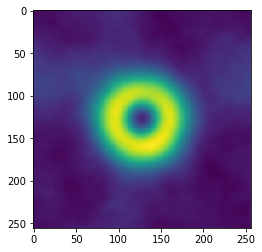

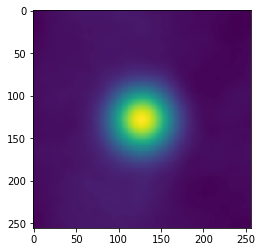

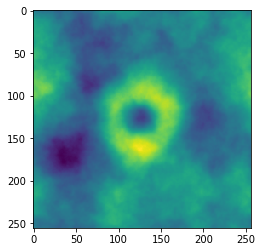

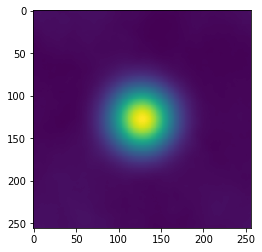

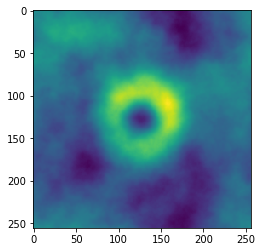

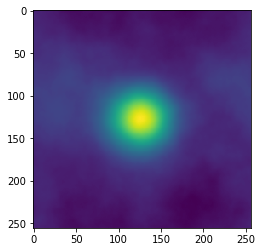

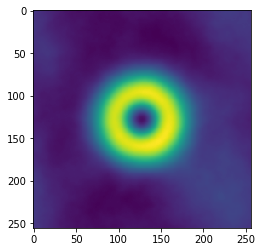

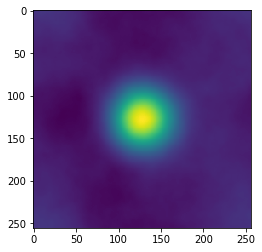

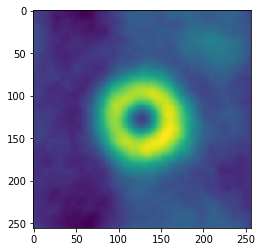

In [20]:
#Number of image data
data = []
for i in range(10):
    blob = Gaussian(10) + 0.01 * noise(2)   
    ring = Gaussian(10) - Gaussian(8) + 0.01 * noise(2)
    data.append(blob)
    data.append(ring)
    plt.imshow(data[i])
    plt.show()
    


# Save to a file
#plt.savefig('Gaussian.eps', format='eps')

In [34]:
type(data[0])
type(data[1])

numpy.ndarray

In [31]:
data[0].shape

(256, 256)

In [38]:
data[0]

array([[-0.17781901, -0.17869375, -0.17914157, ..., -0.17372946,
        -0.17456866, -0.17596082],
       [-0.17571233, -0.17663778, -0.17741182, ..., -0.17344964,
        -0.17384947, -0.17491618],
       [-0.1736968 , -0.17499002, -0.17554121, ..., -0.17192992,
        -0.17235978, -0.17309732],
       ...,
       [-0.1800157 , -0.18113628, -0.18260188, ..., -0.18118528,
        -0.18022432, -0.1800159 ],
       [-0.17891296, -0.18030403, -0.18111083, ..., -0.17829381,
        -0.17791355, -0.17761824],
       [-0.1784378 , -0.1792952 , -0.17976455, ..., -0.17634297,
        -0.17547583, -0.17655025]])

# K - Means Clustering 
Unsupervised Machine Learning Clustering Algorithm

In [ ]:
#train_x, train_y = x_data[0:650], y_data[0:650]
train_x, train_y = GaussianData

#train_x = np.asarray(train_x)
#train_y = np.asarray(train_y)

#X = train_x.reshape(-1, 1)
#Y = train_y.reshape(-1, 1)

# Default:
# KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
kmeans = KMeans(n_clusters = 2).fit(X, Y)
#kmeans.labels_

test = np.array([24.50, 12.75, 0., 0., 0., 2., 4.75, 1., 1., 2., 0., 0., 444., 1.]).reshape(-1,1)
kmeans.predict(test)

In [36]:
train_x, train_y = data


ValueError: too many values to unpack (expected 2)